In [1]:
#Assignment 8 PCA
#Mohsin

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('wine.csv')



In [2]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 14)

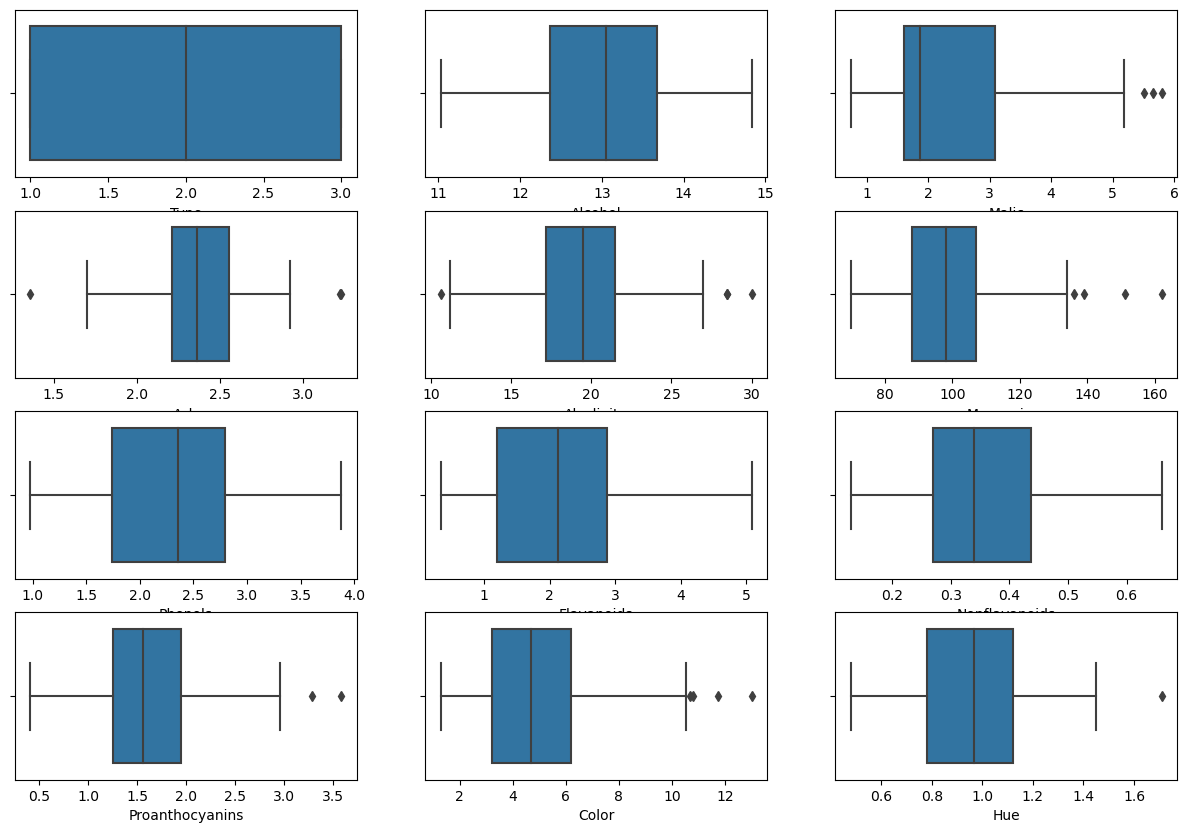

In [6]:
# Boxplots to visualize the distribution of each variable
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    if i < 13:
        sns.boxplot(x=df.iloc[:, i], ax=ax)

<AxesSubplot:>

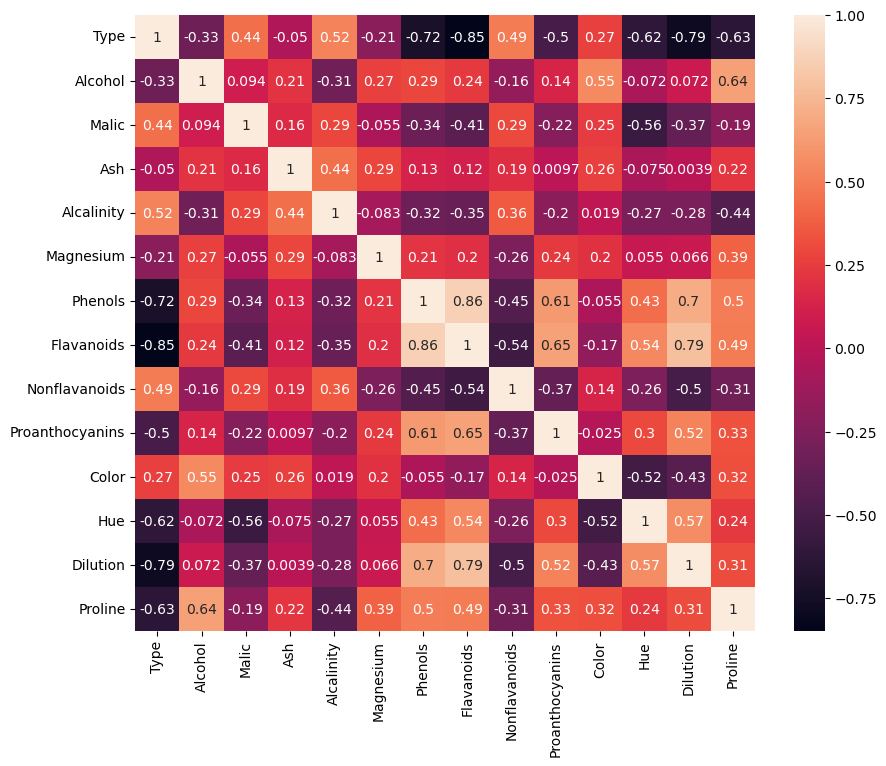

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

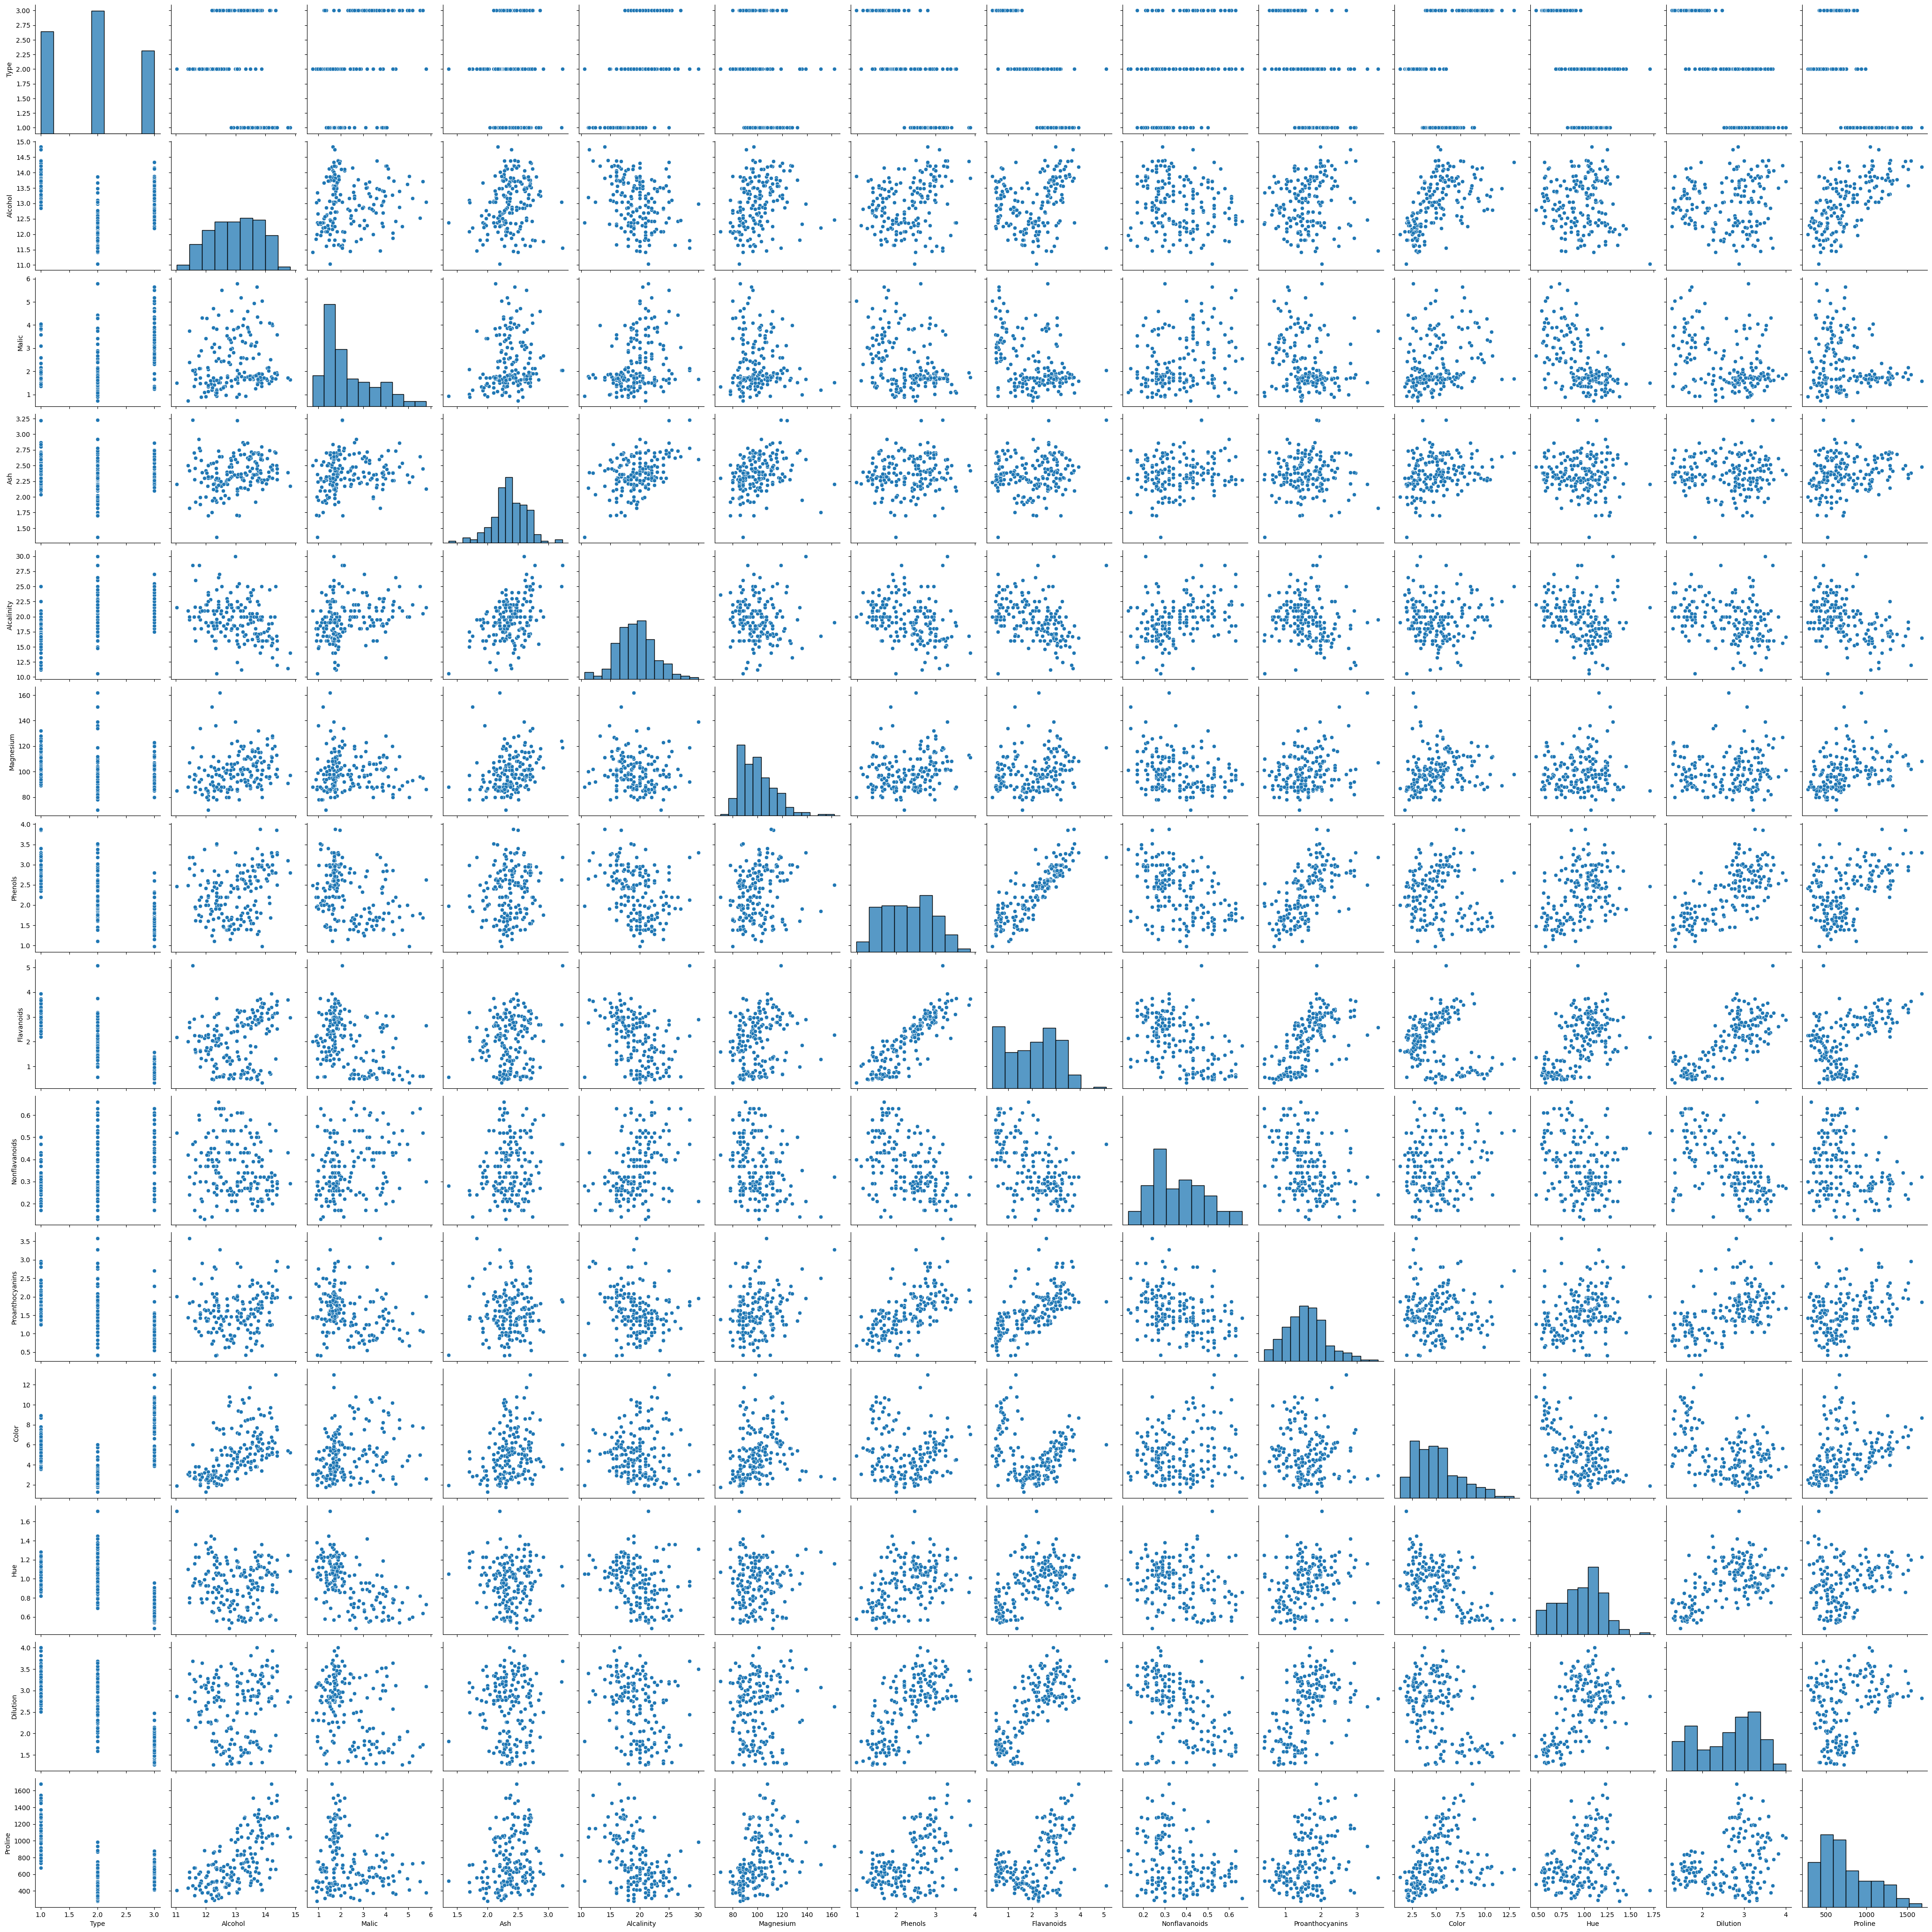

In [9]:
# Pairwise scatter plots
sns.pairplot(data=df, height=3)

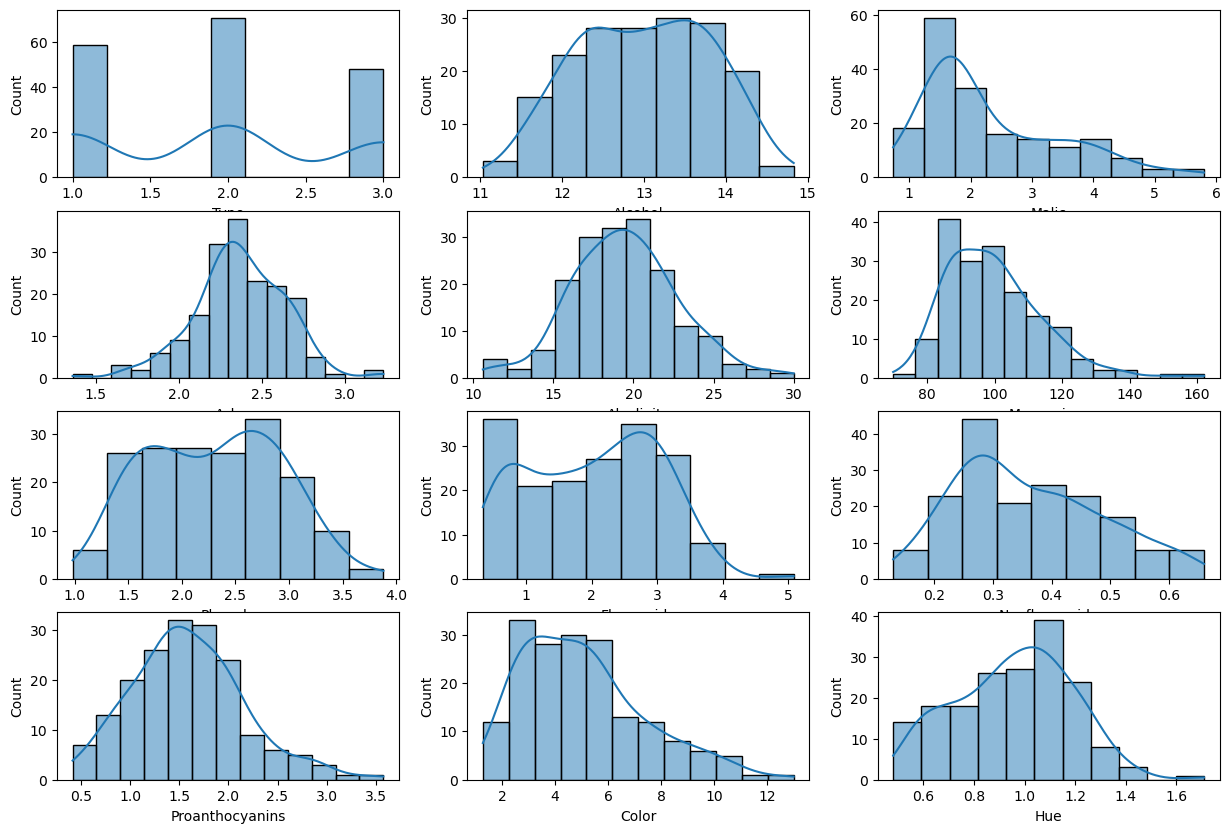

In [10]:
# Distribution of each variable

fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flatten()):
    if i < 13:
        sns.histplot(data=df.iloc[:, i], kde=True, ax=ax)

plt.show()

In [7]:

# Drop the 'Type' column and make a backup copy
df_backup = df.drop('Type', axis=1).copy()

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_backup)


In [8]:

# Perform PCA on the scaled data
pca = PCA(n_components=3)
df_pca_scores = pca.fit_transform(df_scaled)

# Cluster the first three principal component scores using hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(df_pca_scores[:, :3])


AgglomerativeClustering(n_clusters=3)

In [9]:

# Cluster the first three principal component scores using k-means clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca_scores[:, :3])


KMeans(n_clusters=3, random_state=42)

In [10]:

# Add cluster assignments to backup dataframe

df_backup['Cluster'] = hc.labels_


In [11]:

# Cluster the original data using hierarchical clustering
hc_orig = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_orig.fit(df_scaled)



AgglomerativeClustering(n_clusters=3)

In [12]:
# Cluster the original data using k-means clustering
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_orig.fit(df_scaled)



KMeans(n_clusters=3, random_state=42)

In [13]:
# Compare the cluster assignments obtained from clustering the first three principal component scores and the original data

print('Adjusted Rand Index (ARI) between HC on PCA scores and HC on original data:', 
      adjusted_rand_score(hc.labels_, hc_orig.labels_))
print('Adjusted Rand Index (ARI) between KMeans on PCA scores and KMeans on original data:', 
      adjusted_rand_score(kmeans.labels_, kmeans_orig.labels_))

Adjusted Rand Index (ARI) between HC on PCA scores and HC on original data: 0.8156586651530175
Adjusted Rand Index (ARI) between KMeans on PCA scores and KMeans on original data: 0.8694277374354856
